In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from numpy import array
from keras.preprocessing.text import one_hot
from keras.layers.embeddings import Embedding
from numpy import asarray
from numpy import zeros
import keras

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r"/content/drive/MyDrive/MSc Project/Data/dataset2.csv")

In [4]:
df

,text,label
0,You Can Smell Hillary’s Fear Daniel Greenfield...,1
1,Watch The Exact Moment Paul Ryan Committed Pol...,1
2,Kerry to go to Paris in gesture of sympathy U....,0
3,Bernie supporters on Twitter erupt in anger ag...,1
4,The Battle of New York: Why This Primary Matte...,0
...,...,...
6330,State Department says it can't find emails fro...,0
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,1
6332,Anti-Trump Protesters Are Tools of the Oligarc...,1
6333,"In Ethiopia, Obama seeks progress on peace, se...",0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


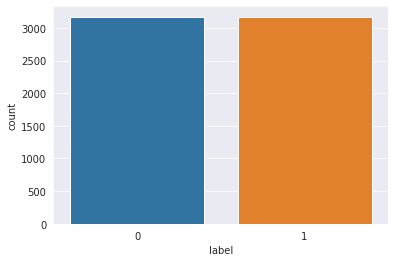

In [5]:
import seaborn as sns
sns.set_style("darkgrid")
sns.countplot(df.label)

In [6]:
X = df['text'].to_list()
y = df['label'].to_list()

In [24]:
X[:5]

['You Can Smell Hillary’s Fear Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. \nIn the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. \nThe word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI. \nBut that’s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillary’s opponent in this election. \nThe FBI is under attack by everyone from Obama to CNN. Hillary’s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldn’t be too surprising if the Clintons or their allies were to start running attack ads against the FBI. \nThe FBI’s leadership 

**PRE-PROCESSING OF DATA**

REMOVING URLs

In [7]:
import re

In [8]:
# Removing URL's
def remove_url(text):
    return re.sub(r'http\S+', '', text)

In [9]:
X_url = [remove_url(x) for x in X]

In [10]:
X_url[:5]

['You Can Smell Hillary’s Fear Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. \nIn the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. \nThe word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI. \nBut that’s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillary’s opponent in this election. \nThe FBI is under attack by everyone from Obama to CNN. Hillary’s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldn’t be too surprising if the Clintons or their allies were to start running attack ads against the FBI. \nThe FBI’s leadership 

LOWERCASING

In [11]:
X_lower = [x.lower() for x in X_url]

In [12]:
X_lower[:5]

['you can smell hillary’s fear daniel greenfield, a shillman journalism fellow at the freedom center, is a new york writer focusing on radical islam. \nin the final stretch of the election, hillary rodham clinton has gone to war with the fbi. \nthe word “unprecedented” has been thrown around so often this election that it ought to be retired. but it’s still unprecedented for the nominee of a major political party to go war with the fbi. \nbut that’s exactly what hillary and her people have done. coma patients just waking up now and watching an hour of cnn from their hospital beds would assume that fbi director james comey is hillary’s opponent in this election. \nthe fbi is under attack by everyone from obama to cnn. hillary’s people have circulated a letter attacking comey. there are currently more media hit pieces lambasting him than targeting trump. it wouldn’t be too surprising if the clintons or their allies were to start running attack ads against the fbi. \nthe fbi’s leadership 

REMOVING ALL NON-ALPHABETS

In [13]:
def cleandata(s):
    replaced = re.sub("[^a-zA-Z' ]+", '', s)
    return replaced

In [14]:
X_re = [cleandata(x) for x in X_lower]

In [16]:
X_re[:5]

['you can smell hillarys fear daniel greenfield a shillman journalism fellow at the freedom center is a new york writer focusing on radical islam in the final stretch of the election hillary rodham clinton has gone to war with the fbi the word unprecedented has been thrown around so often this election that it ought to be retired but its still unprecedented for the nominee of a major political party to go war with the fbi but thats exactly what hillary and her people have done coma patients just waking up now and watching an hour of cnn from their hospital beds would assume that fbi director james comey is hillarys opponent in this election the fbi is under attack by everyone from obama to cnn hillarys people have circulated a letter attacking comey there are currently more media hit pieces lambasting him than targeting trump it wouldnt be too surprising if the clintons or their allies were to start running attack ads against the fbi the fbis leadership is being warned that the entire 

In [15]:
len(X_re[0])

7366

STOPWORD REMOVAL

In [17]:
import nltk
from nltk.corpus import stopwords

In [18]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
stop = set(stopwords.words('english'))

In [20]:
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

In [21]:
X_stop = [remove_stopwords(x) for x in X_re]

In [23]:
X_stop[:5]

['smell hillarys fear daniel greenfield shillman journalism fellow freedom center new york writer focusing radical islam final stretch election hillary rodham clinton gone war fbi word unprecedented thrown around often election ought retired still unprecedented nominee major political party go war fbi thats exactly hillary people done coma patients waking watching hour cnn hospital beds would assume fbi director james comey hillarys opponent election fbi attack everyone obama cnn hillarys people circulated letter attacking comey currently media hit pieces lambasting targeting trump wouldnt surprising clintons allies start running attack ads fbi fbis leadership warned entire leftwing establishment form lynch mob continue going hillary fbis credibility attacked media democrats preemptively head results investigation clinton foundation hillary clinton covert struggle fbi agents obamas doj people gone explosively public new york times compared comey j edgar hoover bizarre headline james co

In [22]:
len(X_stop[0])

4971

In [ ]:
df = pd.DataFrame(list(zip(X_stop, y)),
               columns =['text', 'label'])

In [ ]:
df.to_csv(r'/content/drive/MyDrive/MSc Project/Data/dataset2_preprocessed.csv', index=False)

In [ ]:
url_saved = '/content/drive/MyDrive/MSc Project/Data/dataset2_preprocessed.csv'
df_save = pd.read_csv(url_saved)
df_save

,text,label
0,smell hillarys fear daniel greenfield shillman...,1
1,watch exact moment paul ryan committed politic...,1
2,kerry go paris gesture sympathy us secretary s...,0
3,bernie supporters twitter erupt anger dnc 'we ...,1
4,battle new york primary matters primary day ne...,0
...,...,...
6330,state department says can't find emails clinto...,0
6331,p pbs stand plutocratic pentagon p pbs stand p...,1
6332,antitrump protesters tools oligarchy informati...,1
6333,ethiopia obama seeks progress peace security e...,0
